In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from functions import heatmap
from functions import regression
from scipy import stats

In [2]:
#
files=["education_data.csv",
       "incentives.csv",
       "cars_by_state.csv",
       "income_data.csv",
       "new_by_age.csv",
       "state_abbreviations.csv",
       "state_party_counts.csv",
       "stations.csv",
       "tax_state.csv",
      "historical_prices.csv"]
dfs={}
for file in files:
    dfs[file]=pd.read_csv(f"../Resources/{file}")

# Vehicle type summary

In [3]:
summary_df=pd.merge(dfs["cars_by_state.csv"],dfs["state_abbreviations.csv"],how="inner",on="State")
summary_df=summary_df[["Year",
            "State",
            "Abbreviation",
            "Electric (EV)",
            "Plug-In Hybrid Electric (PHEV)",
            "Hybrid Electric (HEV)",
            "Gasoline",
            "Diesel"]]
summary_df

Year    State Abbreviation  Electric (EV)  \
0    2021  Alabama           AL           4700   
1    2020  Alabama           AL           2900   
2    2019  Alabama           AL           2000   
3    2018  Alabama           AL           1300   
4    2017  Alabama           AL            800   
..    ...      ...          ...            ...   
301  2020  Wyoming           WY            300   
302  2019  Wyoming           WY            200   
303  2018  Wyoming           WY            200   
304  2017  Wyoming           WY            100   
305  2016  Wyoming           WY            100   

     Plug-In Hybrid Electric (PHEV)  Hybrid Electric (HEV)  Gasoline  Diesel  
0                              3300                  42500   4051000  123500  
1                              2100                  36300   3863500  154100  
2                              1800                  33700   3806700  144900  
3                              1500                  31800   3733700  135900  
4                              1100                  30600   3750700  131500  
..                              ...                    ...       ...     ...  
301                             300                   4700    456200   77400  
302                             200                   4200    452800   75400  
303                             200                   4100    450100   72900  
304                             100                   4000    448600   71200  
305                             100                   3800    448600   69900  

[306 rows x 8 columns]

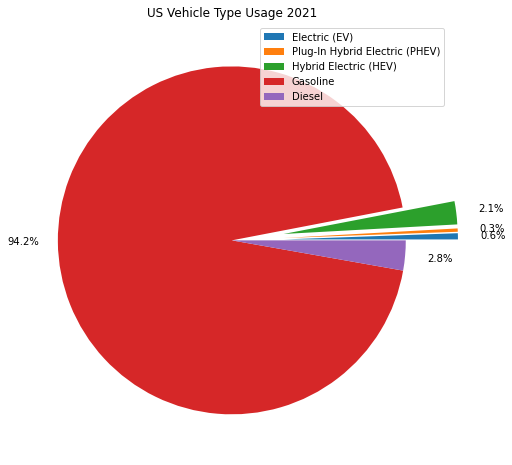

In [4]:
amounts=summary_df[summary_df["Year"]==2021][["Electric (EV)","Plug-In Hybrid Electric (PHEV)","Hybrid Electric (HEV)","Gasoline","Diesel"]].sum()
explode=(.3,.3,.3,0,0,)
plt.figure(figsize=(8,8))
plt.pie(amounts,explode=explode,autopct="%1.1f%%",pctdistance=1.2)
plt.legend(amounts.index)
plt.title("US Vehicle Type Usage 2021")
plt.show()

In [5]:
summary_df["Alternative total"]=summary_df["Electric (EV)"]+summary_df["Plug-In Hybrid Electric (PHEV)"]+summary_df["Hybrid Electric (HEV)"]
summary_df["Fuel total"]=summary_df["Gasoline"]+summary_df["Diesel"]
summary_df["Total vehicles"]=summary_df["Alternative total"]+summary_df["Fuel total"]
summary_df["Alternative Rate(%)"]=round(summary_df["Alternative total"]*100/summary_df["Total vehicles"],3)
reduced_df=summary_df[["Year","State","Abbreviation","Alternative total","Fuel total","Total vehicles","Alternative Rate(%)"]]
reduced_df=reduced_df.sort_values("Alternative Rate(%)", ascending=False)
reduced_df=reduced_df.reset_index(drop=True)

In [6]:
top_reduced_df=reduced_df[reduced_df["Year"]==2021].sort_values("Alternative Rate(%)", ascending=False)
top_reduced_df=top_reduced_df.reset_index(drop=True)
top_reduced_df.head()

Year                 State Abbreviation  Alternative total  Fuel total  \
0  2021  District of Columbia           DC              22300      281000   
1  2021            California           CA            2234300    31223100   
2  2021            Washington           WA             331100     6075600   
3  2021                Oregon           OR             170400     3312500   
4  2021                Hawaii           HI              47500      983900   

   Total vehicles  Alternative Rate(%)  
0          303300                7.352  
1        33457400                6.678  
2         6406700                5.168  
3         3482900                4.892  
4         1031400                4.605

In [7]:
bottom_reduced_df=reduced_df[reduced_df["Year"]==2021].sort_values("Alternative Rate(%)")
bottom_reduced_df=bottom_reduced_df.reset_index(drop=True)
bottom_reduced_df.head()

Year         State Abbreviation  Alternative total  Fuel total  \
0  2021   Mississippi           MS              21100     2365900   
1  2021     Louisiana           LA              31200     3300200   
2  2021  North Dakota           ND               6200      649800   
3  2021       Alabama           AL              50500     4174500   
4  2021       Wyoming           WY               6600      544500   

   Total vehicles  Alternative Rate(%)  
0         2387000                0.884  
1         3331400                0.937  
2          656000                0.945  
3         4225000                1.195  
4          551100                1.198

In [8]:
heatmap(summary_df[summary_df["Year"]==2021],"State","Alternative Rate(%)")

:Overlay
   .Tiles.I    :Tiles   [x,y]
   .Polygons.I :Polygons   [Longitude,Latitude]   (Alternative Rate(%),State)

# Population analysis

### Education analysis

In [8]:
adult_population=dfs["education_data.csv"]["No education"]+dfs["education_data.csv"]["High School"]+dfs["education_data.csv"]["GED or alternative"]+dfs["education_data.csv"]["associates"]+dfs["education_data.csv"]["Bachelors"]+dfs["education_data.csv"]["Masters"]+dfs["education_data.csv"]["Professional"]+dfs["education_data.csv"]["Doctorate"]
ed_df=pd.DataFrame({"State":dfs["education_data.csv"]["State"],
                    "High School not finished(%)":round(100*dfs["education_data.csv"]["No education"]/adult_population,3),
                    "High School finished(%)":round(100*(dfs["education_data.csv"]["High School"]+dfs["education_data.csv"]["GED or alternative"]+dfs["education_data.csv"]["associates"]+dfs["education_data.csv"]["Bachelors"]+dfs["education_data.csv"]["Masters"]+dfs["education_data.csv"]["Professional"]+dfs["education_data.csv"]["Doctorate"])/adult_population,3),
                    "Grad School finished(%)":round(100*(dfs["education_data.csv"]["associates"]+dfs["education_data.csv"]["Bachelors"]+dfs["education_data.csv"]["Masters"]+dfs["education_data.csv"]["Professional"]+dfs["education_data.csv"]["Doctorate"])/adult_population,3),
                    "Post-grad School finished(%)":round(100*(dfs["education_data.csv"]["Masters"]+dfs["education_data.csv"]["Professional"]+dfs["education_data.csv"]["Doctorate"])/adult_population,3)
                   })
education_df=pd.merge(reduced_df[reduced_df["Year"]==2021],ed_df,how="inner",on="State")
education_df.head()

Year                 State Abbreviation  Alternative total  Fuel total  \
0  2021  District of Columbia           DC              22300      281000   
1  2021            California           CA            2234300    31223100   
2  2021            Washington           WA             331100     6075600   
3  2021                Oregon           OR             170400     3312500   
4  2021                Hawaii           HI              47500      983900   

   Total vehicles  Alternative Rate(%)  High School not finished(%)  \
0          303300                7.352                        1.557   
1        33457400                6.678                        4.590   
2         6406700                5.168                        1.905   
3         3482900                4.892                        1.698   
4         1031400                4.605                        1.590   

   High School finished(%)  Grad School finished(%)  \
0                   98.443                   79.347   
1                   95.410                   64.786   
2                   98.095                   67.225   
3                   98.302                   65.126   
4                   98.410                   61.805   

   Post-grad School finished(%)  
0                        44.272  
1                        20.106  
2                        20.139  
3                        19.679  
4                        16.573

The correlation between Alternative Rate(%) and High School not finished(%) is 0.32 with a p-value of 0.02


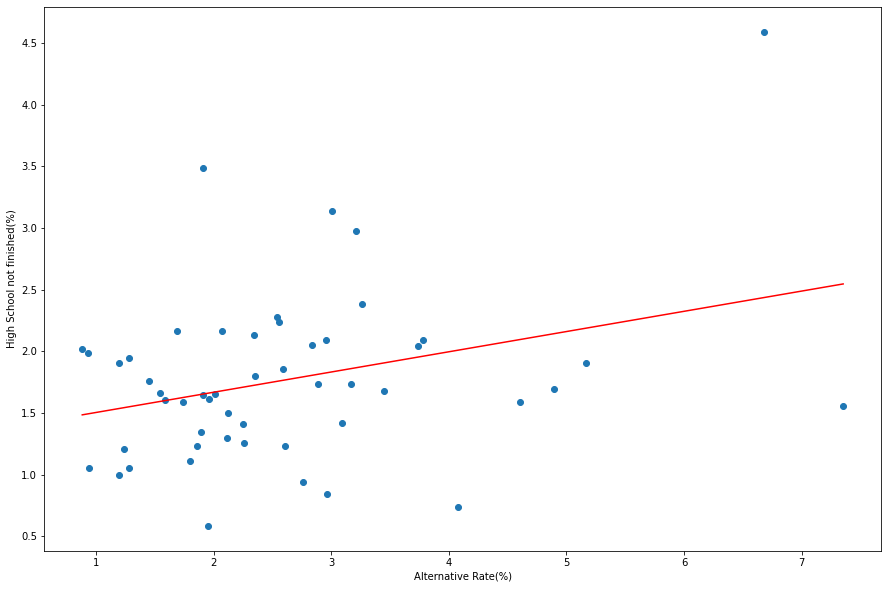

The r-squared value of the linear regression model is 0.10


In [9]:
regression(education_df,"Alternative Rate(%)","High School not finished(%)")

The correlation between Alternative Rate(%) and High School finished(%) is -0.32 with a p-value of 0.02


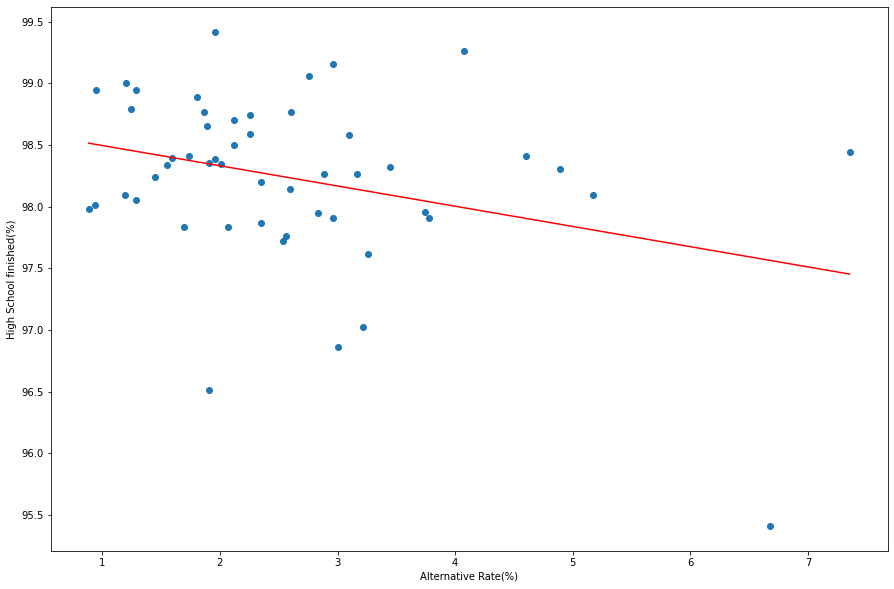

The r-squared value of the linear regression model is 0.10


In [10]:
regression(education_df,"Alternative Rate(%)","High School finished(%)")

The correlation between Alternative Rate(%) and Grad School finished(%) is 0.73 with a p-value of 0.00


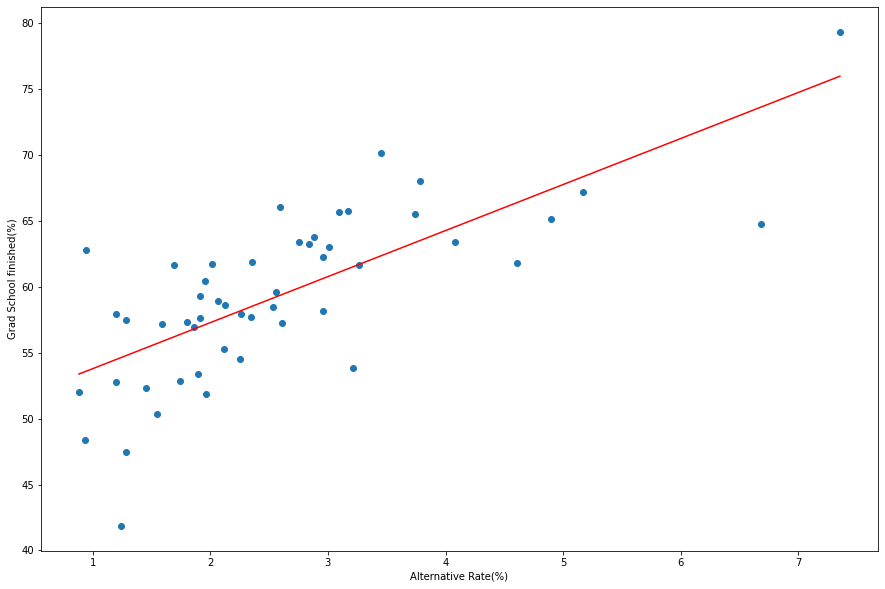

The r-squared value of the linear regression model is 0.54


In [11]:
regression(education_df,"Alternative Rate(%)","Grad School finished(%)")

The correlation between Alternative Rate(%) and Post-grad School finished(%) is 0.74 with a p-value of 0.00


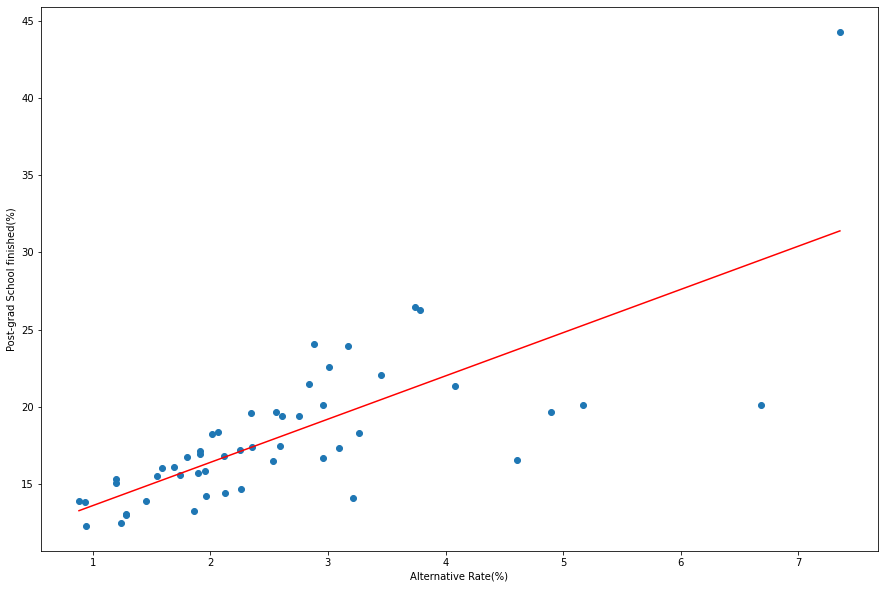

The r-squared value of the linear regression model is 0.55


In [12]:
regression(education_df,"Alternative Rate(%)","Post-grad School finished(%)")

## Income analysis

In [13]:
income_df=pd.merge(reduced_df[reduced_df["Year"]==2021],dfs["income_data.csv"],how="inner",on="State")
income_df.head()

Year                 State Abbreviation  Alternative total  Fuel total  \
0  2021  District of Columbia           DC              22300      281000   
1  2021            California           CA            2234300    31223100   
2  2021            Washington           WA             331100     6075600   
3  2021                Oregon           OR             170400     3312500   
4  2021                Hawaii           HI              47500      983900   

   Total vehicles  Alternative Rate(%)  Income Per Capita Income Category  
0          303300                7.352            63793.0            high  
1        33457400                6.678            41276.0          medium  
2         6406700                5.168            43817.0          medium  
3         3482900                4.892            37816.0          medium  
4         1031400                4.605            39045.0          medium

### find quartiles

The state with the highest income per capita is District of Columbia ($63793.00)


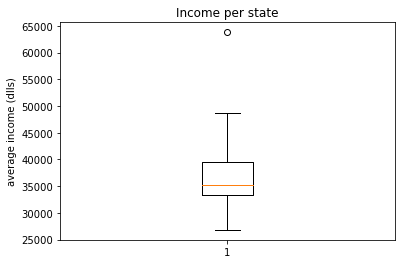

In [14]:
ipc=income_df['Income Per Capita']

fig1,ax1=plt.subplots()
ax1.set_title('Income per state')
ax1.set_ylabel('average income (dlls)')
ax1.boxplot(ipc)
plt.show

max_inc=max(income_df["Income Per Capita"])
max_inc_state=income_df.loc[income_df["Income Per Capita"]==max_inc,"State"][0]
print(f"The state with the highest income per capita is {max_inc_state} (${max_inc:.2f})")

The correlation between Income Per Capita and Alternative Rate(%) is 0.73 with a p-value of 0.00


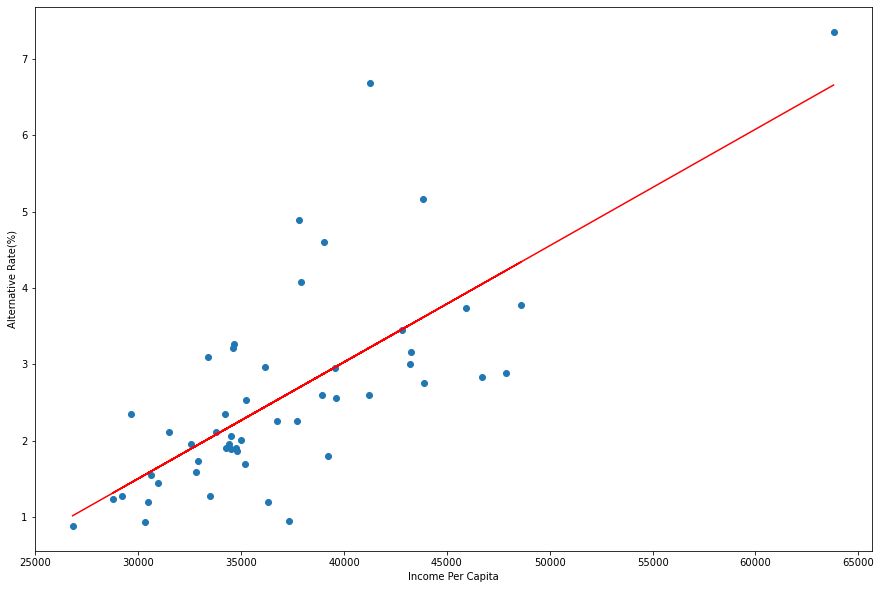

The r-squared value of the linear regression model is 0.53


In [15]:
regression(income_df,'Income Per Capita','Alternative Rate(%)')


In [17]:
heatmap(income_df,"State","Income Per Capita")

:Overlay
   .Tiles.I    :Tiles   [x,y]
   .Polygons.I :Polygons   [Longitude,Latitude]   (Income Per Capita,State)

## Age analysis

In [16]:
age_df=pd.merge(reduced_df[reduced_df["Year"]==2021],dfs["new_by_age.csv"],how="inner",on="State")

age_df["Total Population"]=age_df["0 - 10"]+age_df["11 - 20"]+age_df["21 - 30"]+age_df["31 - 40"]+age_df["41 - 50"]+age_df["51 - 60"]+age_df["61 - 70"]+age_df["70+"]
age_df["21-30"]=age_df["21 - 30"]/age_df["Total Population"]*100
age_df["31-50"]=(age_df["31 - 40"]+age_df["41 - 50"])/age_df["Total Population"]*100
age_df["51-70"]=(age_df["51 - 60"]+age_df["61 - 70"])/age_df["Total Population"]*100
age_df["71+"]=age_df["70+"]/age_df["Total Population"]*100

age_df=age_df[["State","Alternative Rate(%)","21-30","31-50","51-70","71+"]]

age_df.head()

State  Alternative Rate(%)      21-30      31-50      51-70  \
0  District of Columbia                7.352  15.241800  37.438581  20.057599   
1            California                6.678  13.050312  28.310197  24.352263   
2            Washington                5.168  12.866690  28.896037  23.960762   
3                Oregon                4.892  12.530998  28.046665  24.739746   
4                Hawaii                4.605  12.629767  27.656430  24.200953   

         71+  
0   7.997106  
1  10.425288  
2  11.290984  
3  12.385639  
4  12.387318

The correlation between'21-3o year olds' and alternative car usage is 0.31 with a p-value of 0.03
The correlation between31-50 year olds' and alternative car usage is 0.69 with a p-value of 0.00
The correlation between 51-70 year olds' and alternative car usage is -0.04 with a p-value of 0.80
The correlation between 71+ year olds' and alternative car usage is -0.30 with a p-value of 0.03


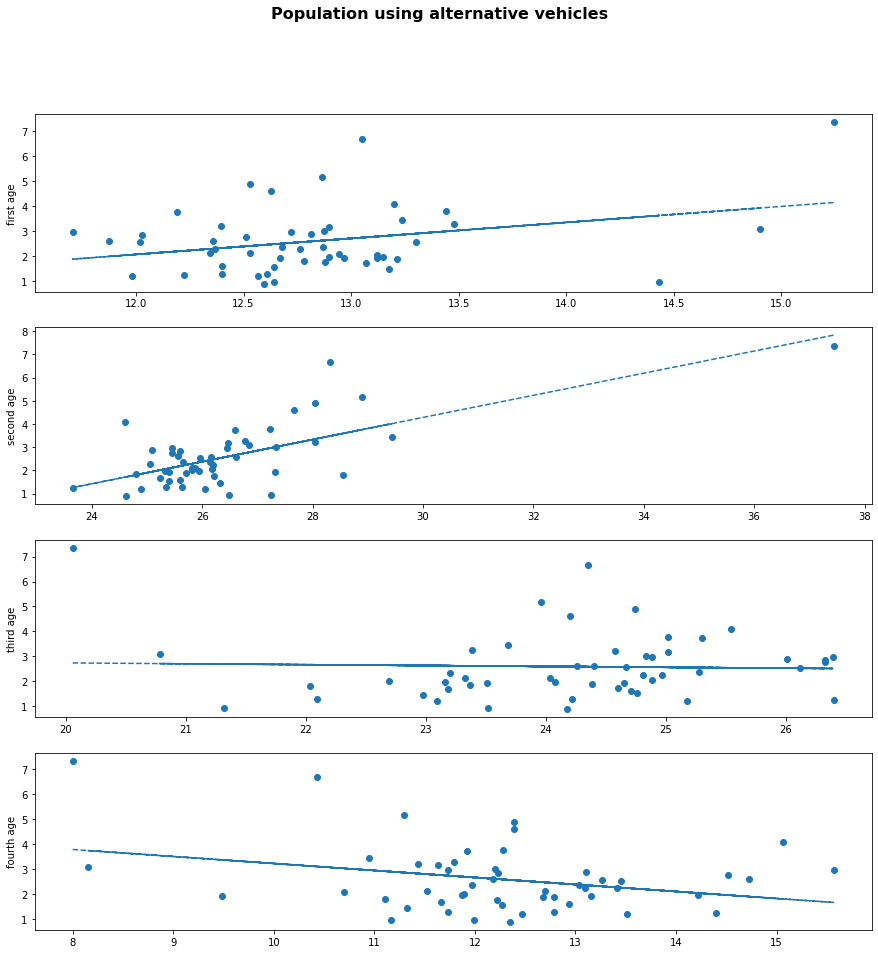

In [17]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,figsize=(15, 15))#,sharex=True)
fig.suptitle("Population using alternative vehicles",fontsize=16,fontweight="bold")#fig_size(10,10)
# fig.figure(figsize=(10,10))

first_age=age_df["21-30"]
second_age=age_df["31-50"]
third_age=age_df["51-70"]
fourth_age=age_df["71+"]

alternative=age_df["Alternative Rate(%)"]

pe1_slope,pe1_int,pe1_r,pe1_p,pe1_std_err=st.linregress(first_age,alternative)
pe1_fit=pe1_slope*first_age+pe1_int

pe2_slope,pe2_int,pe2_r,pe2_p,pe2_std_err=st.linregress(second_age,alternative)
pe2_fit=pe2_slope*second_age+pe2_int

pe3_slope,pe3_int,pe3_r,pe3_p,pe3_std_err=st.linregress(third_age,alternative)
pe3_fit=pe3_slope*third_age+pe3_int

pe4_slope,pe4_int,pe4_r,pe4_p,pe4_std_err=st.linregress(fourth_age,alternative)
pe4_fit=pe4_slope*fourth_age+pe4_int

ax1.scatter(first_age,alternative)
ax1.plot(first_age,pe1_fit,"--")
ax1.set_ylabel('first age')
corr1, pvalue1 = st.pearsonr(first_age,alternative)
print(f"The correlation between'21-3o year olds' and alternative car usage is {corr1:.2f} with a p-value of {pvalue1:.2f}")

ax2.scatter(second_age,alternative)
ax2.plot(second_age,pe2_fit,"--")
ax2.set_ylabel('second age')
corr2, pvalue2 = st.pearsonr(second_age,alternative)
print(f"The correlation between31-50 year olds' and alternative car usage is {corr2:.2f} with a p-value of {pvalue2:.2f}")


ax3.scatter(third_age,alternative)
ax3.plot(third_age,pe3_fit,"--")
ax3.set_ylabel('third age')
corr3, pvalue3 = st.pearsonr(third_age,alternative)
print(f"The correlation between 51-70 year olds' and alternative car usage is {corr3:.2f} with a p-value of {pvalue3:.2f}")


ax4.scatter(fourth_age,alternative)
ax4.plot(fourth_age,pe4_fit,"--")
ax4.set_ylabel('fourth age')
corr4, pvalue4 = st.pearsonr(fourth_age,alternative)
print(f"The correlation between 71+ year olds' and alternative car usage is {corr4:.2f} with a p-value of {pvalue4:.2f}")



In [20]:
heatmap(age_df,"State","31-50")

:Overlay
   .Tiles.I    :Tiles   [x,y]
   .Polygons.I :Polygons   [Longitude,Latitude]   (31-50,State)

# Gas price analysis

### Historical Prices

In [21]:
#Weekly U.S. Regular Conventional Retail Gasoline Prices (Dollars per Gallon)

gas_prices=pd.DataFrame(dfs["historical_prices.csv"])

gas_prices = gas_prices.rename(columns={
    'Weekly U.S. Regular Conventional Retail Gasoline Prices  (Dollars per Gallon)': 'Total U.S.',
    'Weekly East Coast Regular Conventional Retail Gasoline Prices  (Dollars per Gallon)': 'East Coast',
    'Weekly New England (PADD 1A) Regular Conventional Retail Gasoline Prices  (Dollars per Gallon)': 'New England',
    'Weekly Central Atlantic (PADD 1B) Regular Conventional Retail Gasoline Prices  (Dollars per Gallon)': 'Central Atlantic',
    'Weekly Lower Atlantic (PADD 1C) Regular Conventional Retail Gasoline Prices  (Dollars per Gallon)': 'Lower Atlantic',
    'Weekly Midwest Regular Conventional Retail Gasoline Prices  (Dollars per Gallon)': 'Midwest',
    'Weekly Gulf Coast Regular Conventional Retail Gasoline Prices  (Dollars per Gallon)': 'Gulf Coast',
    'Weekly Rocky Mountain Regular Conventional Retail Gasoline Prices  (Dollars per Gallon)': 'Rocky Mountain',
    'Weekly West Coast Regular Conventional Retail Gasoline Prices  (Dollars per Gallon)': 'West Coast'
})

gas_prices 
                               

Date  Total U.S.  East Coast  New England  Central Atlantic  \
0     1/4/2010       2.627       2.657        2.725             2.749   
1    1/11/2010       2.717       2.755        2.801             2.851   
2    1/18/2010       2.703       2.758        2.805             2.832   
3    1/25/2010       2.666       2.728        2.785             2.800   
4     2/1/2010       2.618       2.682        2.748             2.761   
..         ...         ...         ...          ...               ...   
680  1/16/2023       3.225       3.252        3.424             3.559   
681  1/23/2023       3.340       3.376        3.412             3.628   
682  1/30/2023       3.417       3.469        3.485             3.699   
683   2/6/2023       3.362       3.411        3.495             3.676   
684  2/13/2023       3.311       3.344        3.465             3.644   

     Lower Atlantic  Midwest  Gulf Coast  Rocky Mountain  West Coast  
0             2.623    2.625       2.535           2.509       2.795  
1             2.722    2.716       2.625           2.578       2.870  
2             2.731    2.672       2.627           2.617       2.870  
3             2.702    2.614       2.600           2.622       2.860  
4             2.653    2.555       2.554           2.615       2.840  
..              ...      ...         ...             ...         ...  
680           3.158    3.166       3.001           3.292       3.724  
681           3.301    3.279       3.115           3.434       3.781  
682           3.401    3.345       3.181           3.544       3.845  
683           3.331    3.259       3.115           3.694       3.841  
684           3.252    3.197       3.066           3.765       3.851  

[685 rows x 10 columns]

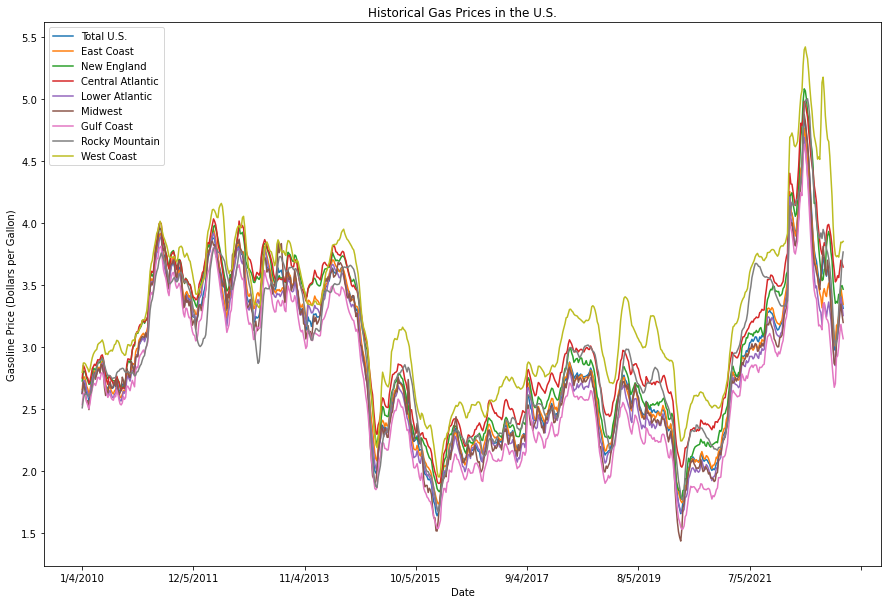

In [22]:
gas_prices.plot(x='Date', figsize=(15, 10))
plt.title('Historical Gas Prices in the U.S.')
plt.xlabel('Date')
plt.ylabel('Gasoline Price (Dollars per Gallon)')
plt.show()

### Tax by state vs # vehicles

In [23]:
Tax_vs_vehicles=pd.merge(dfs["tax_state.csv"],top_reduced_df,how="inner",on="State")
Tax_vs_vehicles=Tax_vs_vehicles[["Year",
            "State",
            "Abbreviation",
            "Gasoline Tax / gallon",
            "Alternative Rate(%)"]]

Tax_vs_vehicles.head()

Year       State Abbreviation Gasoline Tax / gallon  Alternative Rate(%)
0  2021     Alabama           AL                $0.28                 1.195
1  2021      Alaska           AK                $0.09                 1.802
2  2021     Arizona           AZ                $0.18                 3.262
3  2021    Arkansas           AR                $0.25                 1.284
4  2021  California           CA                $0.54                 6.678

The correlation between Gasoline Tax / gallon and Alternative Rate(%) is 0.36 with a p-value of 0.01


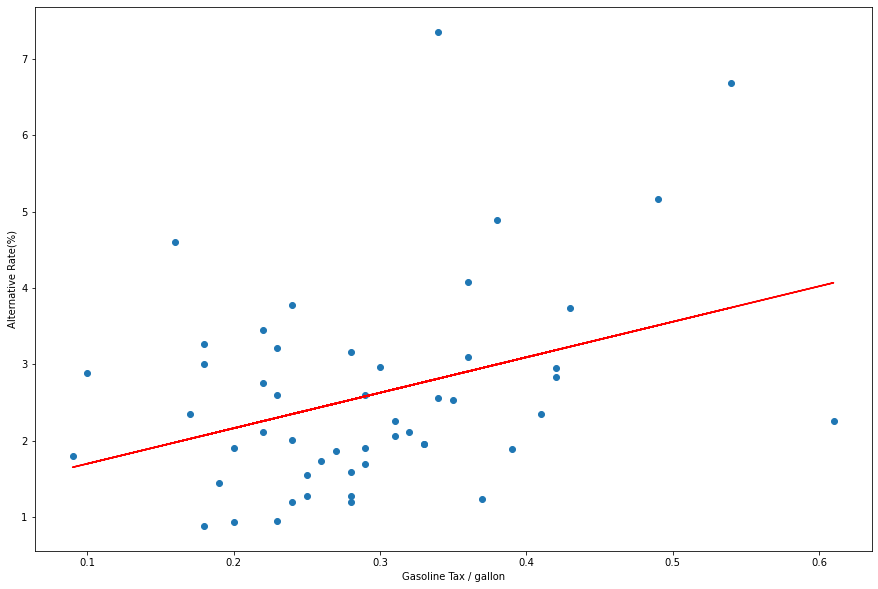

The r-squared value of the linear regression model is 0.13


In [24]:
Tax_vs_vehicles['Gasoline Tax / gallon'] = Tax_vs_vehicles['Gasoline Tax / gallon'].astype(str).str.replace('$', '').astype(float)

regression(Tax_vs_vehicles,'Gasoline Tax / gallon','Alternative Rate(%)')
# corr, pvalue = st.pearsonr(Tax_vs_vehicles['Gasoline Tax / gallon'], Tax_vs_vehicles['Alternative Rate(%)'])
# print(f"The correlation between Gasoline Tax and Alternative Rate is {corr:.2f} with a p-value of {pvalue:.2f}")
# model = st.linregress(Tax_vs_vehicles['Gasoline Tax / gallon'], Tax_vs_vehicles['Alternative Rate(%)'])
# r_squared = model.rvalue**2

# y_values = Tax_vs_vehicles['Gasoline Tax / gallon']*model[0]+model[1]
# plt.scatter(Tax_vs_vehicles['Gasoline Tax / gallon'],Tax_vs_vehicles['Alternative Rate(%)'])
# plt.plot(Tax_vs_vehicles['Gasoline Tax / gallon'],y_values,color="red")
# plt.xlabel('Gasoline Tax / gallon')
# plt.ylabel('Alternative Rate(%)')
# plt.show()

# print(f"The r-squared value of the linear regression model is {r_squared:.2f}")

# Political analysis

### Political Party Preference

In [18]:
Party_pref=pd.DataFrame(dfs["state_party_counts.csv"])

Party_pref = Party_pref.rename(columns={
    'state': 'State'})

Party_pref

Party_pref['Political Preference'] = Party_pref['Most Wins'].map({'Republican': 1, 'Neutral':2 , 'Democrat':3})

top_reduced_df["State"] = top_reduced_df["State"].str.upper()
top_reduced_df = top_reduced_df.rename(columns={
    'Alternative Rate(%)': 'AlternativeRate_Pct'})


In [20]:
Political_pref_vs_vehicles = pd.merge(Party_pref, top_reduced_df, on="State")[["State", "Abbreviation", "Most Wins", "Political Preference", "AlternativeRate_Pct"]]

Political_pref_vs_vehicles.head()

State Abbreviation   Most Wins  Political Preference  \
0     ALABAMA           AL  Republican                     1   
1      ALASKA           AK  Republican                     1   
2     ARIZONA           AZ  Republican                     1   
3    ARKANSAS           AR  Republican                     1   
4  CALIFORNIA           CA    Democrat                     3   

   AlternativeRate_Pct  
0                1.195  
1                1.802  
2                3.262  
3                1.284  
4                6.678

The correlation between Political Preference and AlternativeRate_Pct is 0.64 with a p-value of 0.00


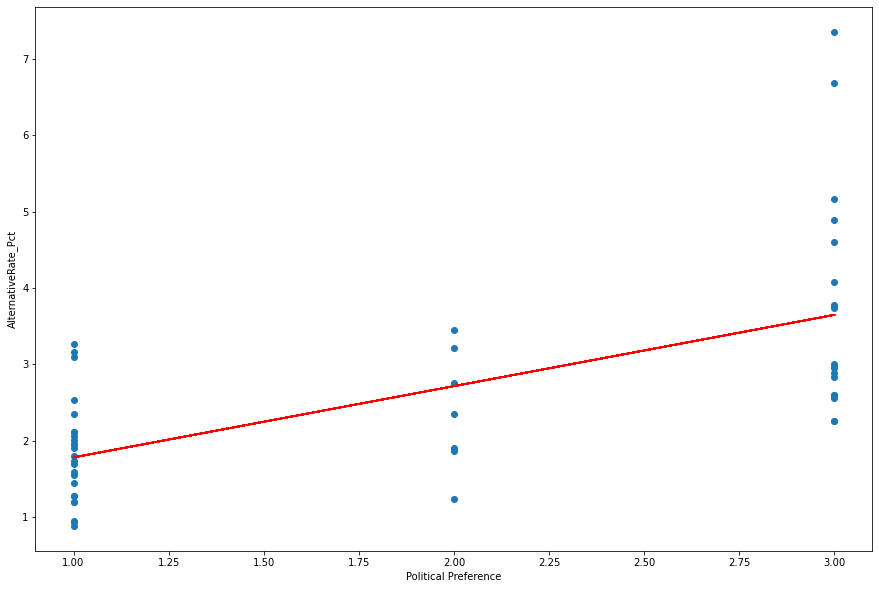

The r-squared value of the linear regression model is 0.41


In [28]:
regression(Political_pref_vs_vehicles,'Political Preference','AlternativeRate_Pct')

# corr, pvalue = st.pearsonr(Political_pref_vs_vehicles['Political Preference'], Political_pref_vs_vehicles['AlternativeRate_Pct'])
# print(f"The correlation between Political Preference and Alternative Rate is {corr:.2f} with a p-value of {pvalue:.2f}")
# model = st.linregress(Political_pref_vs_vehicles['Political Preference'], Political_pref_vs_vehicles['AlternativeRate_Pct'])
# r_squared = model.rvalue**2

# y_values = Political_pref_vs_vehicles['Political Preference']*model[0]+model[1]
# plt.scatter(Political_pref_vs_vehicles['Political Preference'],Political_pref_vs_vehicles['AlternativeRate_Pct'])
# plt.plot(Political_pref_vs_vehicles['Political Preference'],y_values,color="red")
# plt.xlabel('Political Preference')
# plt.ylabel('AlternativeRate_Pct')
# plt.show()

# print(f"The r-squared value of the linear regression model is {r_squared:.2f}")

In [22]:
republican = Political_pref_vs_vehicles[Political_pref_vs_vehicles["Political Preference"]==1]
republican.AlternativeRate_Pct.mean()

1.8444800000000001

In [23]:
democrat = Political_pref_vs_vehicles[Political_pref_vs_vehicles["Political Preference"]==3]
democrat.AlternativeRate_Pct.mean()


3.7337777777777776

In [26]:
stats.ttest_ind(republican.AlternativeRate_Pct, democrat.AlternativeRate_Pct, equal_var=False)


Ttest_indResult(statistic=-5.036026493630137, pvalue=4.853783005218271e-05)

#### p-value -> 0.00 / Alpha -> 0.05 => Alpha > p-value => Reject null hypothesis (The means are different)

### Laws and incentives

In [28]:
laws_df=dfs["incentives.csv"][["Unnamed: 0","Laws and Regulations","State Incentives","Utility/Private Incentives"]]
laws_df=laws_df.loc[(laws_df["Unnamed: 0"]!="US")]
laws_df=pd.merge(laws_df,summary_df.loc[summary_df["Year"]==2021],left_on="Unnamed: 0",right_on="Abbreviation",how="inner")
laws_df=laws_df.drop(labels="Unnamed: 0",axis="columns")
laws_df.head()

Laws and Regulations  State Incentives  Utility/Private Incentives  Year  \
0                    12               6.0                        13.0  2021   
1                    56              41.0                        52.0  2021   
2                    23              13.0                        14.0  2021   
3                    13               4.0                         2.0  2021   
4                    14              10.0                         2.0  2021   

                  State Abbreviation  Electric (EV)  \
0               Arizona           AZ          40700   
1            California           CA         563100   
2              Colorado           CO          37000   
3  District of Columbia           DC           3700   
4              Illinois           IL          36500   

   Plug-In Hybrid Electric (PHEV)  Hybrid Electric (HEV)  Gasoline  Diesel  \
0                           15500                 132200   5395300  191800   
1                          315300                1355900  30512600  710500   
2                           16100                 113600   4456600  208400   
3                            2500                  16100    278900    2100   
4                           18300                 214300   8657800  169900   

   Alternative total  Fuel total  Total vehicles  Alternative Rate(%)  
0             188400     5587100         5775500                3.262  
1            2234300    31223100        33457400                6.678  
2             166700     4665000         4831700                3.450  
3              22300      281000          303300                7.352  
4             269100     8827700         9096800                2.958

The correlation between Alternative Rate(%) and Total is 0.65 with a p-value of 0.00


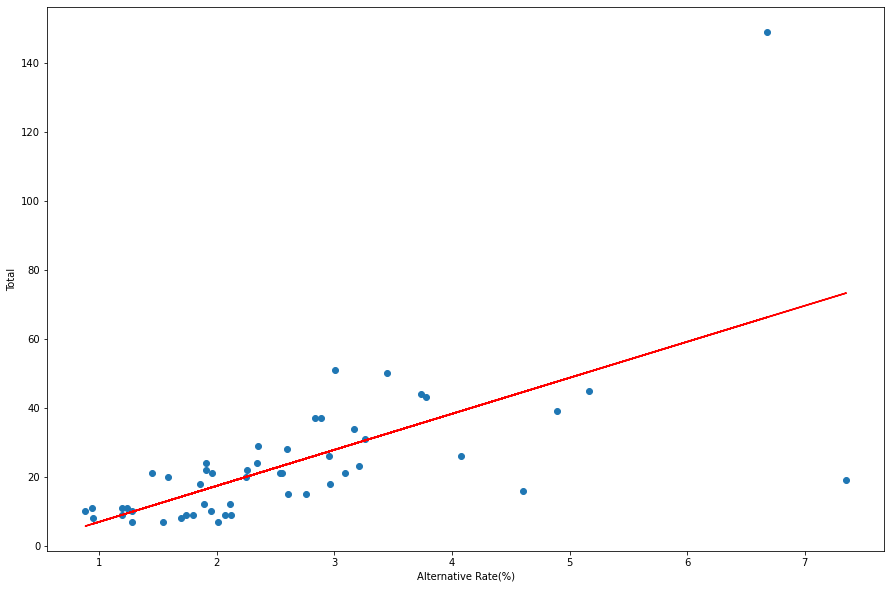

The r-squared value of the linear regression model is 0.42


In [29]:
laws_df["Total"]=laws_df["Laws and Regulations"]+laws_df["State Incentives"]+laws_df["Utility/Private Incentives"]
regression(laws_df,"Alternative Rate(%)","Total")

### Station analysis

In [30]:
# Create stations by state out of list of stations
stationsbystate=dfs["stations.csv"].groupby("state").count()
stationsbystate=stationsbystate[["station_name"]]
stationsbystate=stationsbystate.rename(columns={"station_name":"Station count"})
stationsbystate=stationsbystate.reset_index(drop=False)
stationsbystate.head()

state  Station count
0    AK             60
1    AL            269
2    AR            228
3    AZ            987
4    CA          15113

In [31]:
stationsbystate=pd.merge(stationsbystate,bottom_reduced_df,how="inner",left_on="state",right_on="Abbreviation")
stationsbystate["Stations per vehicle"]=stationsbystate["Station count"]/stationsbystate["Total vehicles"]
stationsbystate.head()

state  Station count  Year       State Abbreviation  Alternative total  \
0    AK             60  2021      Alaska           AK               9100   
1    AL            269  2021     Alabama           AL              50500   
2    AR            228  2021    Arkansas           AR              30300   
3    AZ            987  2021     Arizona           AZ             188400   
4    CA          15113  2021  California           CA            2234300   

   Fuel total  Total vehicles  Alternative Rate(%)  Stations per vehicle  
0      495900          505000                1.802              0.000119  
1     4174500         4225000                1.195              0.000064  
2     2330400         2360700                1.284              0.000097  
3     5587100         5775500                3.262              0.000171  
4    31223100        33457400                6.678              0.000452

The correlation between Stations per vehicle and Alternative Rate(%) is 0.82 with a p-value of 0.00


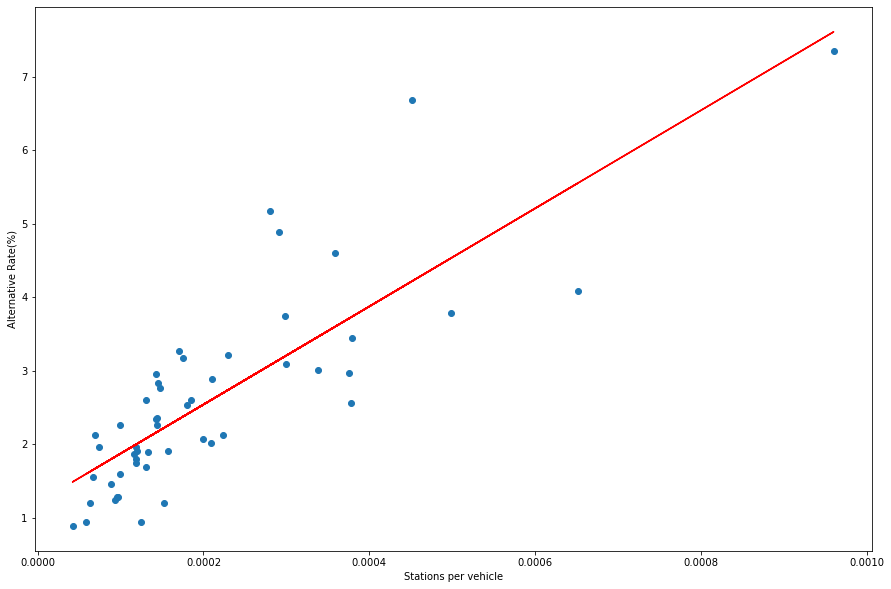

The r-squared value of the linear regression model is 0.67


In [32]:
regression(stationsbystate,"Stations per vehicle","Alternative Rate(%)")

In [33]:
heatmap(stationsbystate,"State","Station count")

:Overlay
   .Tiles.I    :Tiles   [x,y]
   .Polygons.I :Polygons   [Longitude,Latitude]   (Station count,State)

#### Stations by State and where to find them

In [34]:
dfs["stations.csv"]=dfs["stations.csv"].loc[dfs["stations.csv"]["longitude"]<(-50.00)].copy()

display_state=input(f"US State to display (Use {dfs['stations.csv']['state'].unique()}")
one_state_gas_df=dfs["stations.csv"].loc[dfs["stations.csv"]["state"]==display_state]
one_state_gas_df.hvplot.points("longitude",
                               "latitude",
                               geo=True,
                               alpha=0.4,
                               height=600,
                               size=50,
                               color="red",
                               tiles="EsriNatGeo",
                               width=800)

US State to display (Use ['CA' 'VT' 'WA' 'OR' 'IL' 'ID' 'TX' 'FL' 'WI' 'IA' 'AZ' 'MD' 'NJ' 'NY'
 'SC' 'CT' 'OH' 'WV' 'MO' 'UT' 'KS' 'MA' 'CO' 'IN' 'MI' 'LA' 'NC' 'VA'
 'TN' 'AL' 'GA' 'HI' 'MN' 'NV' 'AR' 'RI' 'PA' 'OK' 'DC' 'ME' 'NH' 'KY'
 'NE' 'MS' 'SD' 'DE' 'NM' 'MT' 'ND' 'WY' 'AK' 'PR' 'ON' 'QC' nan]CA


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]